<a href="https://colab.research.google.com/github/Amulya-k-2002/Customer_segmentation_mini_project/blob/main/sales_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
table=pd.read_csv(r"/content/advertising.csv")
table

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
# understanding the data
table.shape

(200, 4)

In [6]:
table.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
table.isnull().mean()*100

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


<Axes: >

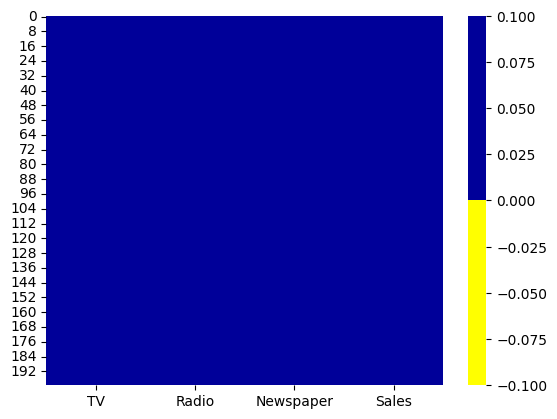

In [10]:
# visualizing the heatmap of null values

cols=table.columns
color=["#ffff00","#000099"]
sns.heatmap(table[cols].isnull(),cmap=sns.color_palette(color))

# **STATISTICAL OVERVIEW**

In [12]:


table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [15]:
sns.set_theme(style="whitegrid")
def dist_plot(x,y):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(121)
  sns.histplot(x,ax=ax,kde=True,color="crimson")
  ax.axvline(x.mean(),color="blue",linestyle="-",linewidth=1.5)
  ax.axvline(x.median(),color="red",linestyle="--",linewidth=1.5)
  ax.set_title("Distribution plot")
  ax.legend(["kde","mean","median"])

  ax2=fig.add_subplot(122)
  sns.boxplot(x,ax=ax2,color="lightgreen")
  ax2.set_title("Boxplot")
  plt.show()


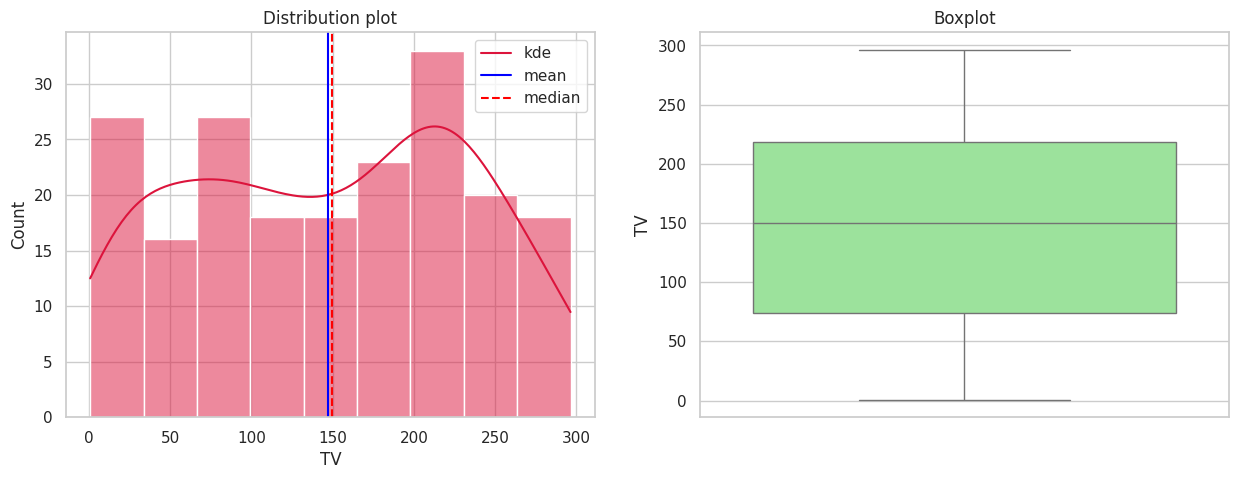

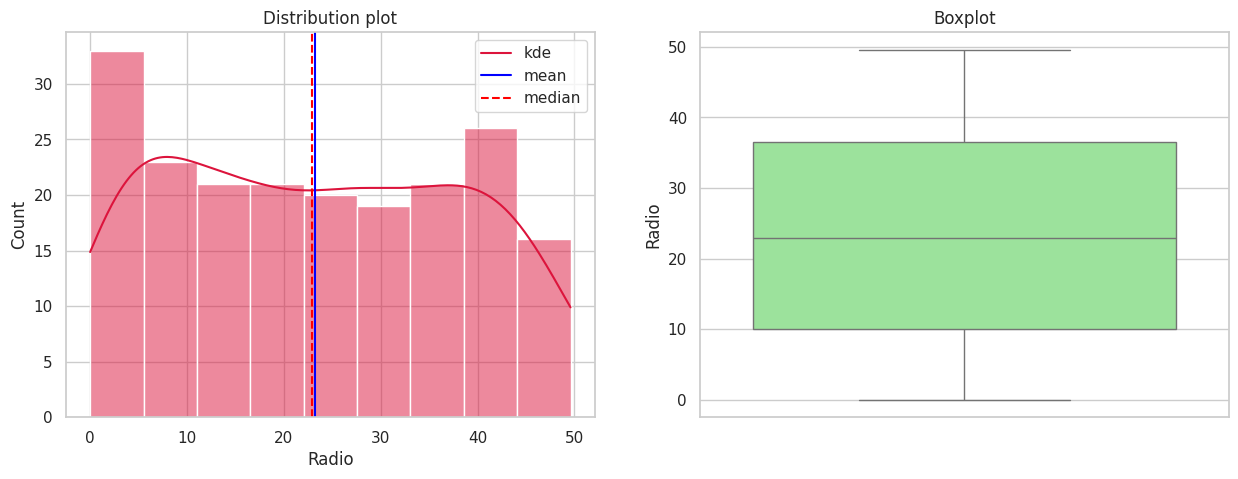

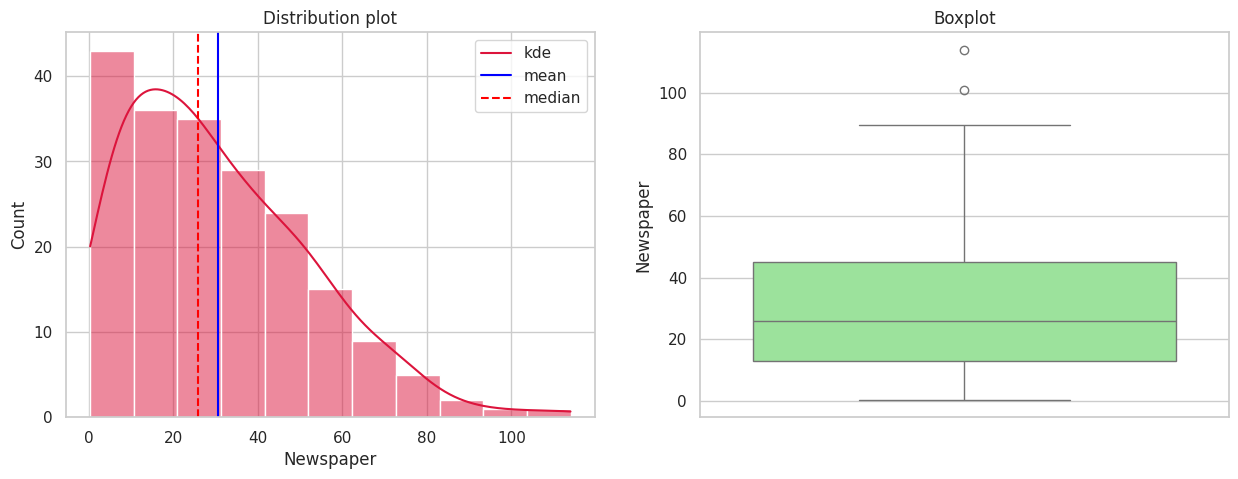

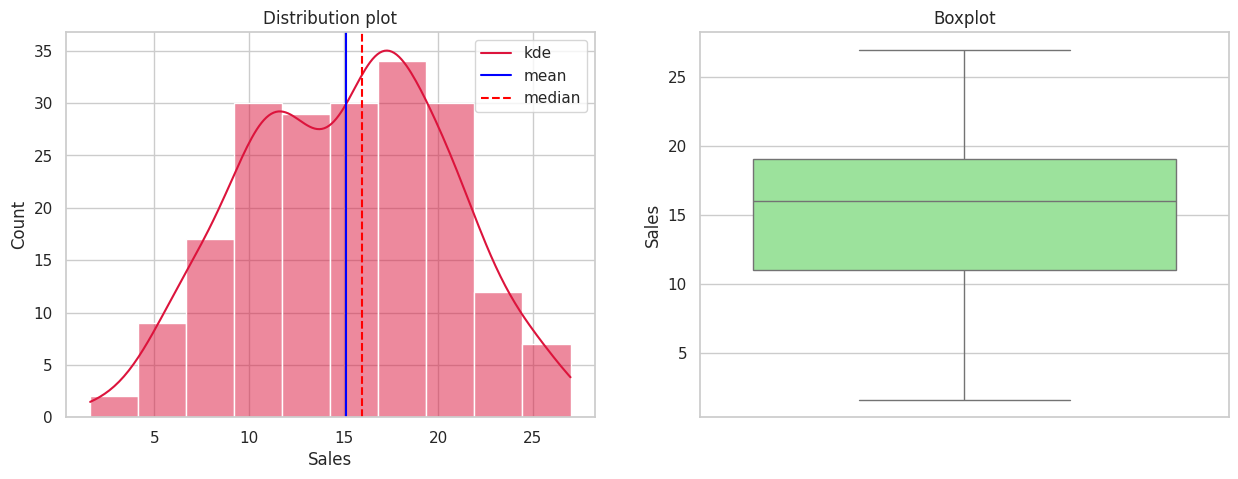

In [17]:
for i in list(table.select_dtypes(include=["number"]).columns):
  dist_plot(table[i],i)
  plt.show()

# **DATA VISUALIZATION**

In [20]:


def viz(x):
  fig=plt.figure(figsize=(10,8))
  sns.displot(x,kind="ecdf",color="black")
  plt.show()

<Figure size 1000x800 with 0 Axes>

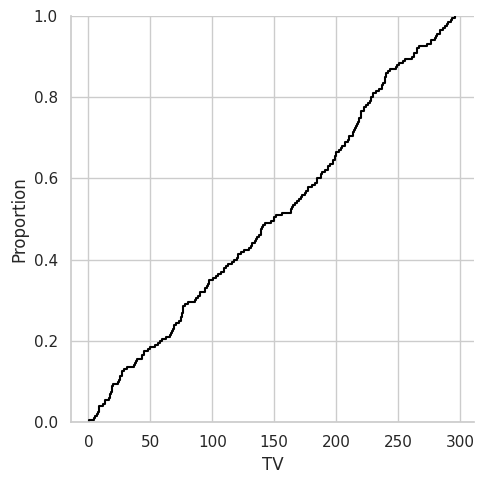

<Figure size 1000x800 with 0 Axes>

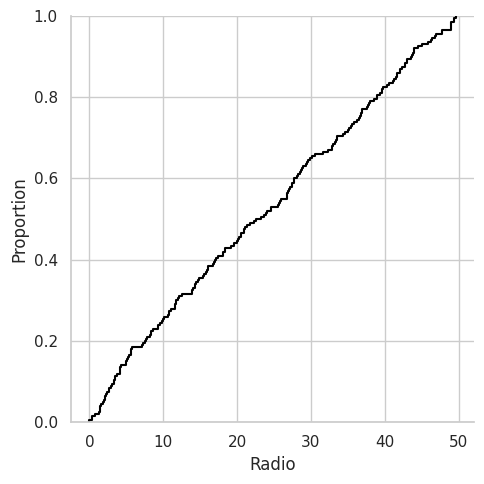

<Figure size 1000x800 with 0 Axes>

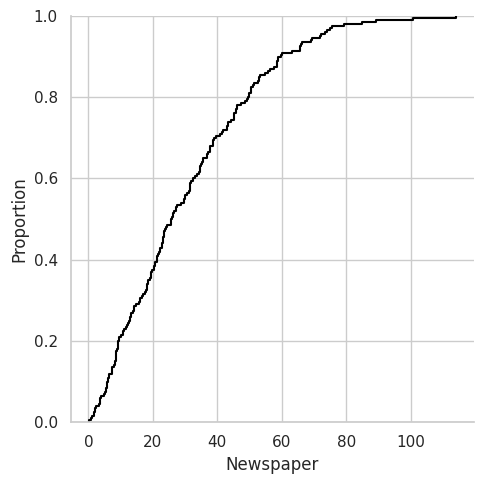

<Figure size 1000x800 with 0 Axes>

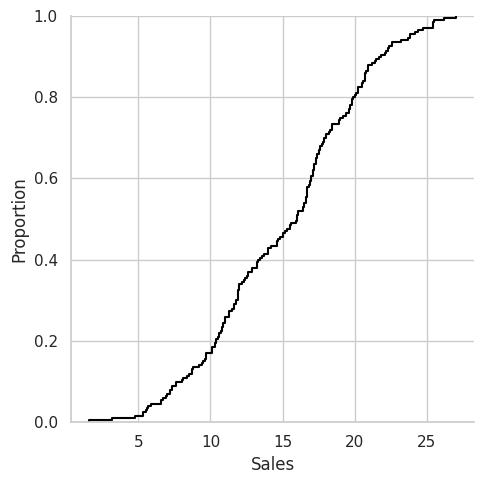

In [21]:
for i in list(table.select_dtypes(include=["number"]).columns):
  viz(table[i])
  plt.show()

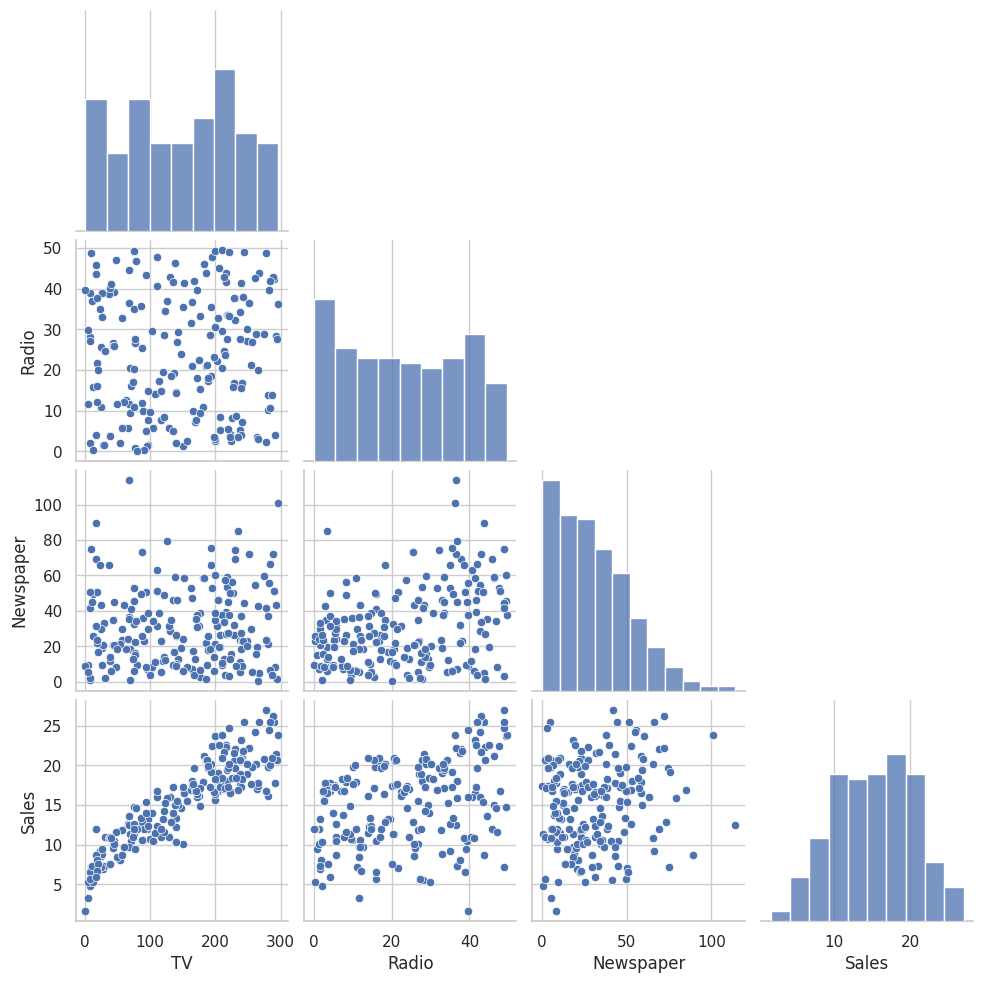

In [26]:
sns.pairplot(data=table,corner=True)

In [33]:
columns=["TV","Radio","Newspaper","Sales"]

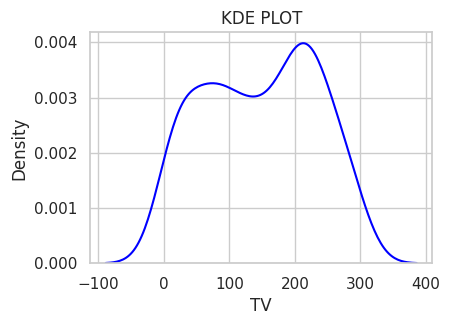

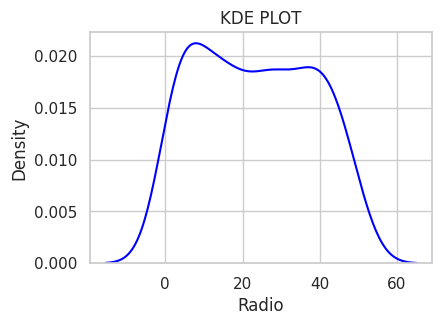

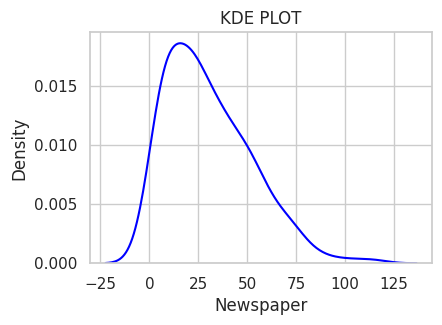

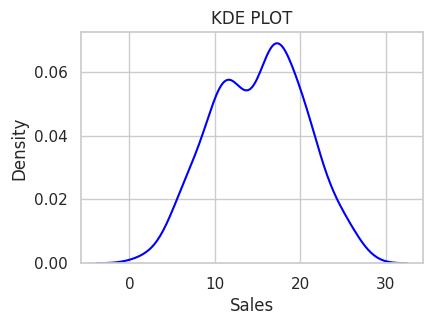

In [36]:
for i in columns:
  plt.figure(figsize=(15,3))
  plt.subplot(131)
  sns.kdeplot(x=table[i],color="blue")
  plt.title("KDE PLOT")







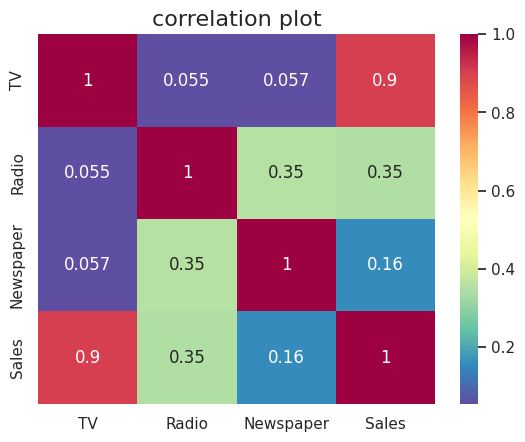

In [38]:
sns.heatmap(table.corr(),cmap="Spectral_r",annot=True)
plt.title(
"correlation plot",
fontsize=16
)
plt.show()

# **MODEL BUILDING**

In [40]:
data=table.copy()
x=data.drop("Sales",axis=1)
y=data[["Sales"]]

In [41]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
X_train , X_test , y_train , y_test=train_test_split(x,y,test_size=0.20,random_state=46)

In [44]:
import statsmodels.api as sm
model=sm.OLS(endog=y,exog=x).fit()

In [45]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2826.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                   1.35e-161
Time:                        11:44:14   Log-Likelihood:                         -460.08
No. Observations:                 200   AIC:                                      926.2
Df Residuals:                     197   BIC:                                      936.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
model.params

,0
TV,0.067079
Radio,0.160033
Newspaper,0.028433


In [47]:
y_pred=model.predict(X_test)

In [48]:
y_pred

,0
123,14.147109
37,14.215818
4,15.516711
138,7.612125
17,26.799855
145,9.971114
177,13.665921
90,10.057271
83,12.721883
110,18.065147


In [51]:
residuals=y_test-y_pred


In [54]:
data=pd.DataFrame({"TV":[60],"Radio":[20],"Newspaper":[30]})

In [56]:
predicted=model.predict(data)
predicted

,0
0,8.078388


# **VARIANCE INFLATION FACTOR**

In [59]:
vif=pd.DataFrame()
vif["features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
1,Radio,3.55
2,Newspaper,3.10
0,TV,2.63


> variance inflation factor is below 5  and pvalues < 0.05 indicating that there is no problem of multi collinearity
> accuracy of the model is 0.97 indicating its a good model